# Analysis: Users

> To compare users, some features are derived and clustering is performed.

## Setup

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [54]:
path = "../data/cleaned/"

In [55]:
# Load cleaned minute data
minute = pd.read_csv(path + "minute_clean.csv")
minute = minute[minute.Calories > 0]
minute

,Id,ActivityMinute,Calories,Intensity,METs,Sleep,Steps
0,1503960366,2016-04-12 00:00:00,0.78650,0.0,10.0,NaN,0.0
1,1503960366,2016-04-12 00:01:00,0.78650,0.0,10.0,NaN,0.0
2,1503960366,2016-04-12 00:02:00,0.78650,0.0,10.0,NaN,0.0
3,1503960366,2016-04-12 00:03:00,0.78650,0.0,10.0,NaN,0.0
4,1503960366,2016-04-12 00:04:00,0.78650,0.0,10.0,NaN,0.0
...,...,...,...,...,...,...,...
1356856,8877689391,2016-05-12 13:55:00,1.33353,0.0,11.0,NaN,0.0
1356857,8877689391,2016-05-12 13:56:00,1.33353,0.0,11.0,NaN,0.0
1356858,8877689391,2016-05-12 13:57:00,1.33353,0.0,11.0,NaN,0.0
1356859,8877689391,2016-05-12 13:58:00,1.33353,0.0,11.0,NaN,0.0


In [56]:
minute.Id.unique().shape

(33,)

In [57]:
# Load weight data
weight = pd.read_csv(path + "weight_clean.csv")
weight

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000
...,...,...,...,...,...,...,...,...
62,8877689391,5/6/2016 6:43:35 AM,85.000000,187.392923,NaN,25.440001,False,1462517015000
63,8877689391,5/8/2016 7:35:53 AM,85.400002,188.274775,NaN,25.559999,False,1462692953000
64,8877689391,5/9/2016 6:39:44 AM,85.500000,188.495234,NaN,25.610001,False,1462775984000
65,8877689391,5/11/2016 6:51:47 AM,85.400002,188.274775,NaN,25.559999,False,1462949507000


## Create DataFrame

In [58]:
users = minute.groupby("Id").count().reset_index()
users.head()

,Id,ActivityMinute,Calories,Intensity,METs,Sleep,Steps
0,1503960366,45721,45721,45721,45721,9580,45721
1,1624580081,44159,44159,44159,44159,0,44159
2,1644430081,42689,42689,42689,42689,1384,42689
3,1844505072,43860,43860,43860,43860,2883,43860
4,1927972279,44160,44160,44160,44160,2065,44160


In [59]:
users = users.loc[:, ["Id", "Calories"]]
users = users.rename({"Calories": "WornMinutes"}, axis=1)
users

,Id,WornMinutes
0,1503960366,45721
1,1624580081,44159
2,1644430081,42689
3,1844505072,43860
4,1927972279,44160
5,2022484408,44100
6,2026352035,45746
7,2320127002,44134
8,2347167796,26241
9,2873212765,44160


In [60]:
avgs = minute.groupby("Id").mean().reset_index()

cols = avgs.columns.values

for i in range(len(cols)):
    if i == 0:
        continue

    cols[i] = "Avg" + cols[i]

avgs.columns = cols

avgs.head()

,Id,AvgCalories,AvgIntensity,AvgMETs,AvgSleep,AvgSteps
0,1503960366,1.278913,0.254478,16.292666,1.067432,8.201089
1,1624580081,1.040603,0.133993,12.522294,NaN,4.025227
2,1644430081,1.979982,0.174541,14.089391,1.247832,5.105765
3,1844505072,1.111422,0.083698,11.877975,1.426639,1.822663
4,1927972279,1.524636,0.030956,10.648279,1.054237,0.643116


In [61]:
users = pd.merge(users, avgs, how="left", on="Id")

In [62]:
# Add features indicating if used weight logging functionality
users["LoggedWeight"] = users.Id.isin(weight.Id.unique()).astype(int)

## Clustering

In [63]:
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [64]:
X = users.drop("AvgSleep", axis=1)

# Select features
X = X.iloc[:, 1:-1]

# Standardize for distances
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Parameter Selection

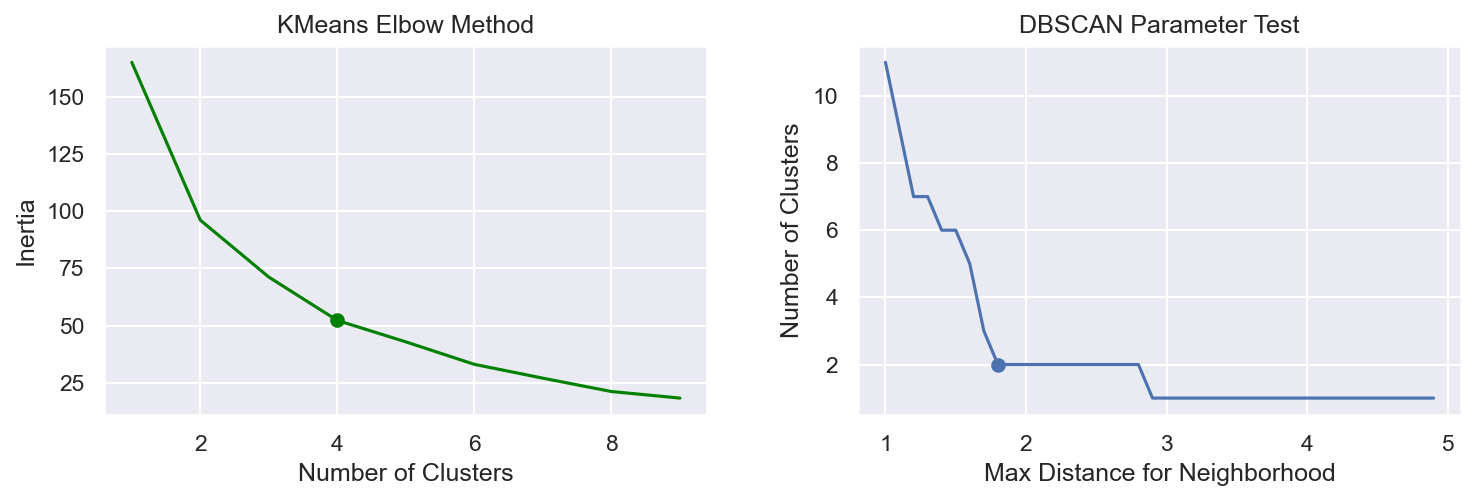

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3.5), dpi=150)

# KMeans -------------------------------

# Elbow method
ks = [i for i in range(1, 10)]
inertia = []

for k in ks:
    km = KMeans(k).fit(X)
    inertia.append(km.inertia_)

# Plotting
k = 4
axes[0].plot(ks, inertia, color="green")
axes[0].scatter([k], [inertia[k - 1]], color="green")
axes[0].set_title("KMeans Elbow Method")
axes[0].set_xlabel("Number of Clusters")
axes[0].set_ylabel("Inertia")

# DBSCAN -------------------------------

num_clusters = dict()
for val in np.arange(1, 5, 0.1):
    db = DBSCAN(eps=val, min_samples=1).fit(X)
    num_clusters[round(val, 2)] = len(set(db.labels_))

axes[1].plot(num_clusters.keys(), num_clusters.values())
axes[1].scatter([1.8], num_clusters[1.8])
axes[1].set_title("DBSCAN Parameter Test")
axes[1].set_xlabel("Max Distance for Neighborhood")
axes[1].set_ylabel("Number of Clusters")

plt.tight_layout()
plt.subplots_adjust(wspace=0.25)
plt.show()

In [66]:
k = 4
eps = 1.8

# KMeans

km = KMeans(k).fit(X)
labels = km.labels_

users["KMeans"] = labels

# DBSCAN

db = DBSCAN(eps=eps, min_samples=1).fit(X)
labels = db.labels_

users["DBSCAN"] = labels

### Visualization

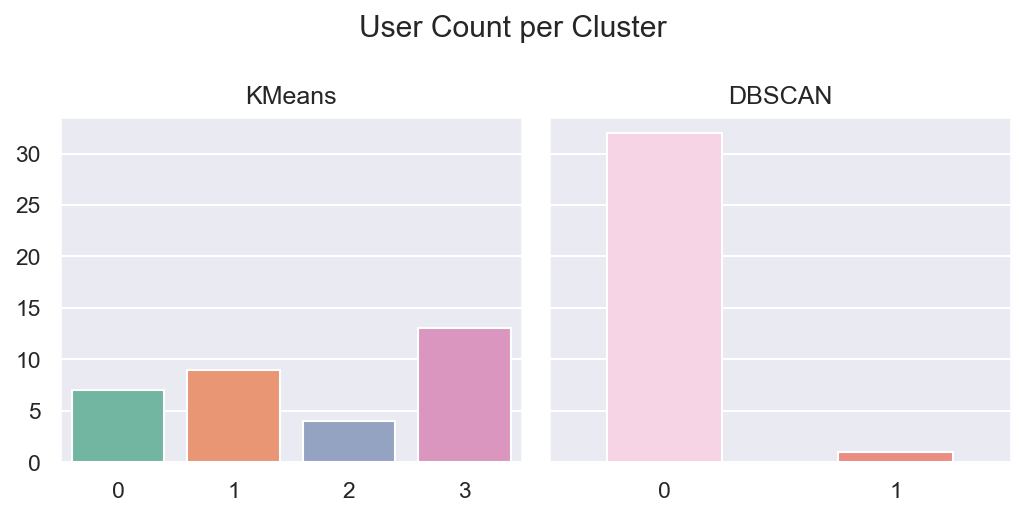

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(7, 3.5), dpi=150, sharey=True)

val_counts = users.KMeans.value_counts()
sns.barplot(x=val_counts.index, y=val_counts.values, palette="Set2", ax=axes[0])
axes[0].set_title("KMeans")

val_counts = users.DBSCAN.value_counts()
sns.barplot(x=val_counts.index, y=val_counts.values, palette="Set3_r", width=0.5, ax=axes[1])
axes[1].set_title("DBSCAN")

plt.suptitle("User Count per Cluster")
plt.tight_layout()
plt.show()

In [69]:
feats_names = ["WornMinutes", "AvgCalories", "AvgIntensity", "AvgSteps"]
aliases = ["Minutes Worn", "Avg. Calories per Minute", "Avg. Intensity per Minute", "Avg. Steps per Minute"]

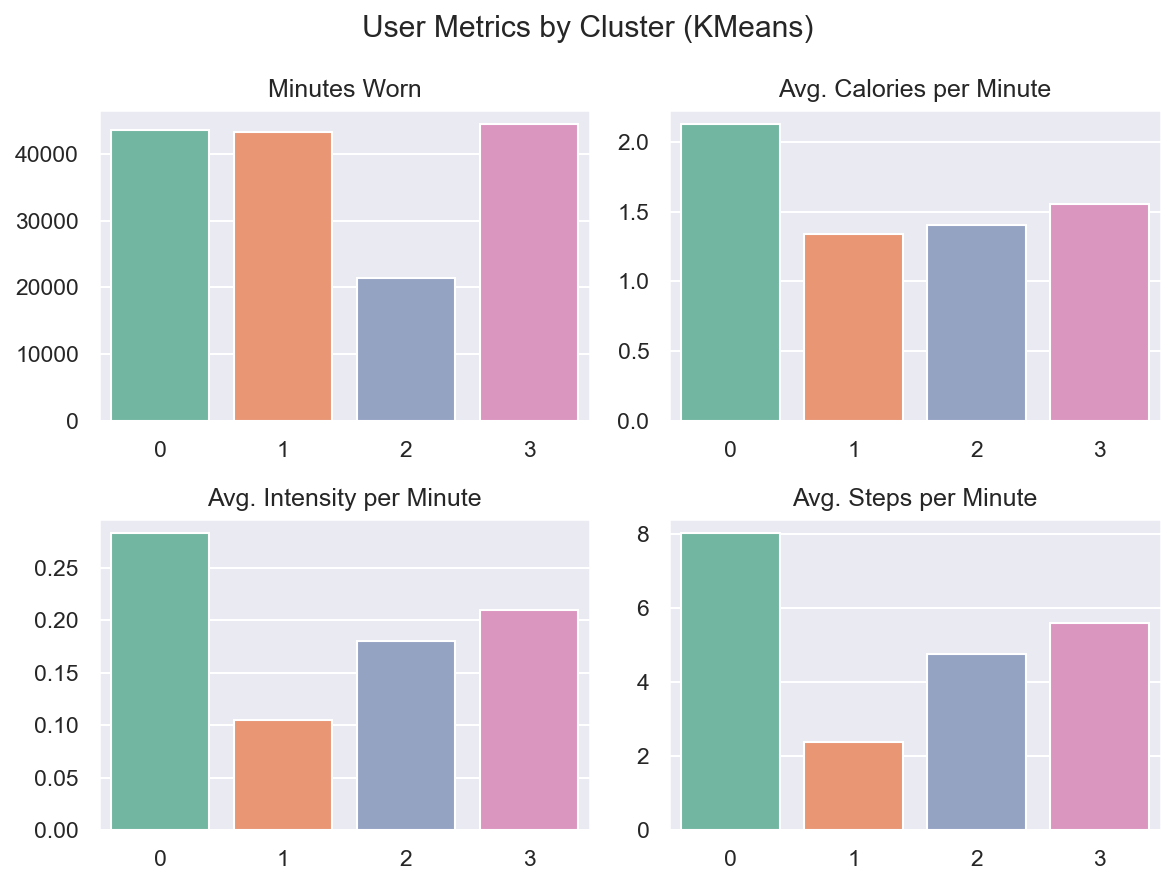

In [70]:
bar_avgs = users.groupby("KMeans").mean().iloc[:, 1:].reset_index()

fig, axes = plt.subplots(2, 2, figsize=(8, 6), dpi=150)

for i, ax in enumerate(axes.reshape(-1)):
    sns.barplot(x=bar_avgs.KMeans, y=bar_avgs[feats_names[i]], ax=ax, palette="Set2")

    ax.set_title(aliases[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.suptitle("User Metrics by Cluster (KMeans)")
plt.subplots_adjust(hspace=0.3, wspace=0.4)
plt.tight_layout()
plt.show()

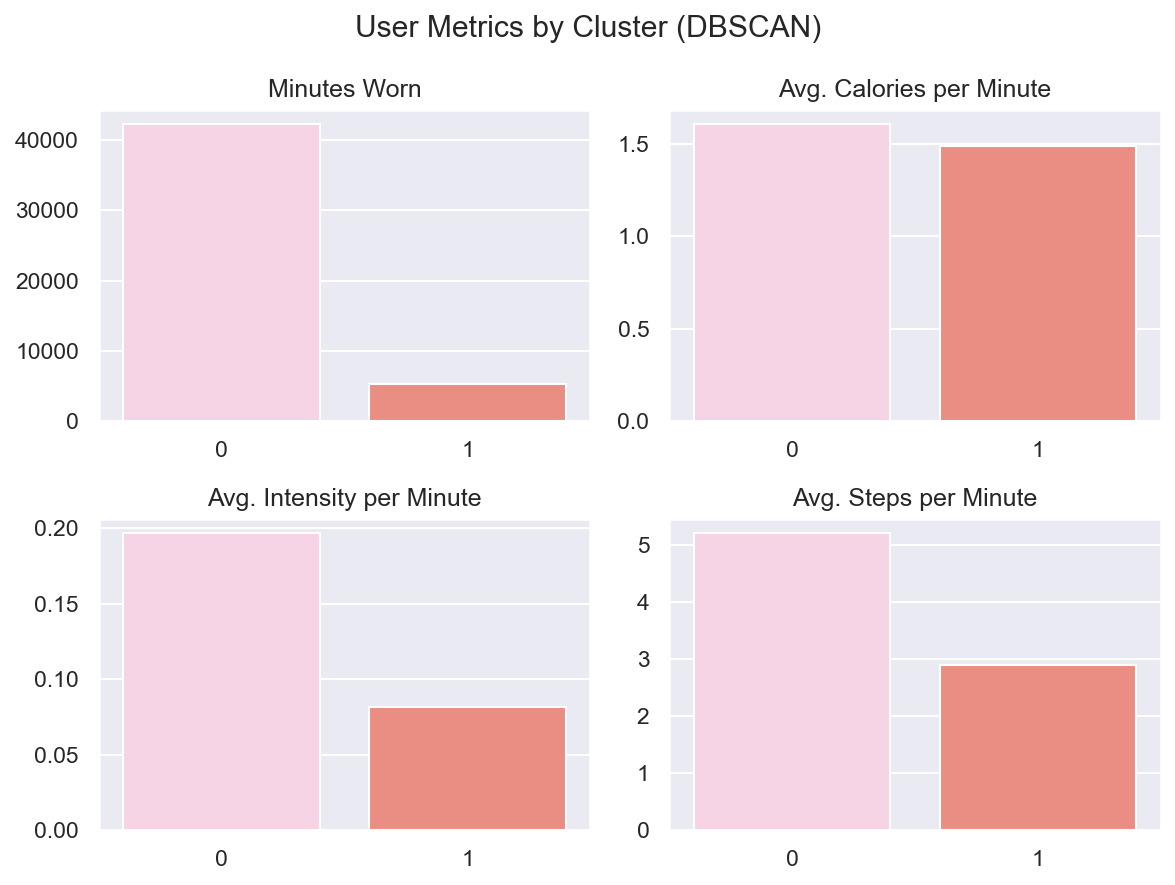

In [71]:
bar_avgs = users.groupby("DBSCAN").mean().iloc[:, 1:].reset_index()

fig, axes = plt.subplots(2, 2, figsize=(8, 6), dpi=150)

for i, ax in enumerate(axes.reshape(-1)):
    sns.barplot(x=bar_avgs.DBSCAN, y=bar_avgs[feats_names[i]], ax=ax, palette="Set3_r")

    ax.set_title(aliases[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.suptitle("User Metrics by Cluster (DBSCAN)")
plt.subplots_adjust(hspace=0.3, wspace=0.4)
plt.tight_layout()
plt.show()

## Write to CSV

In [76]:
users.to_csv(path + "users_clean.csv", index=False)